<a href="https://colab.research.google.com/github/akrautsky/ml-bootcamp/blob/main/EnsembleTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_moons( n_samples=1000, shuffle=True, noise=0.3, random_state=42 )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(y_train)

(800, 800)

In [ ]:
X_train[:5, :]

array([[ 2.23604306,  0.47050357],
       [-1.35126768,  0.42639702],
       [-0.27826163,  1.2588558 ],
       [-0.0366919 ,  0.97971677],
       [ 0.40385756, -0.10326387]])

### Try our fist ensemble with different predictors on the make moon data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
linear_clf = LogisticRegression()
svc_clf = SVC()
rf_clf = RandomForestClassifier()

In [ ]:
voting_clf = VotingClassifier([('linear_clf', linear_clf), ('svc', svc_clf), ('RF', rf_clf)], voting='hard')

In [ ]:
# fit the ensemble on the data
voting_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('linear_clf', LogisticRegression()),
                             ('svc', SVC()), ('RF', RandomForestClassifier())])

In [ ]:
# lets see how the model perform
from sklearn.metrics import accuracy_score

# get the accuracy score for voting clf
voting_clf_preds = voting_clf.predict(X_test)
acc_voting_clf = accuracy_score(y_test, voting_clf_preds)
print(f'Voting classifier score:: {acc_voting_clf}')


# get the accuracy score for all the classifiers
for clf in (linear_clf, svc_clf, rf_clf):
  clf.fit(X_train, y_train)
  clf_preds = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, clf_preds))


Voting classifier score:: 0.905
LogisticRegression 0.82
SVC 0.915
RandomForestClassifier 0.915


In [ ]:
## As we can see from above experiment that the ensembl is a strong learning

### Bagging and Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bg_clf = BaggingClassifier( base_estimator=DecisionTreeClassifier(), n_estimators=500, bootstrap=True, max_samples=100, n_jobs=-1, oob_score=True)

In [ ]:
bg_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [ ]:
bagg_pred = bg_clf.predict(X_test)

In [ ]:
bagg_accuracy_score = accuracy_score(y_test, bagg_pred)

In [ ]:
bagg_accuracy_score

0.91

In [ ]:
 bg_clf.oob_score_

0.905

#### Random patches and Random Subspaces
* Random patches: 
		Keeping all the feature but samples the instances
* Random subspaces:
		Keeping all the instance but sampling the features
		Max_features and feature_bootstrap




In [ ]:
# use random forest instead of using the baggingClassifier and passing the DecisionTreeClassifier cause
# it more adaptatble and easy to easy 

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
random_forest_clf = RandomForestClassifier( n_estimators=500, bootstrap=True, n_jobs=-1, max_leaf_nodes=16)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [ ]:
print( accuracy_score( y_test, random_forest_clf.predict(X_test)))

0.92


In [ ]:
random_forest_clf.predict(X_test)

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0])

In [ ]:
### Getting the feature importance coefficeint 


In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
forest_clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, n_jobs=-1, max_leaf_nodes=16)
forest_clf_1.fit(data.data, data.target)

RandomForestClassifier(max_leaf_nodes=16, n_jobs=-1)

In [ ]:
for name, i in zip(data.feature_names, forest_clf_1.feature_importances_):
  print( f'{name} : {i}')

sepal length (cm) : 0.09903118795064708
sepal width (cm) : 0.026154008919787225
petal length (cm) : 0.4489195378628259
petal width (cm) : 0.4258952652667398


### Boosting Techniquenes

#### ADA Boost

In [ ]:

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X = load_iris().data

In [ ]:
y = load_iris().target

In [ ]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
# lets do multicalss classification with ADABOOST
X_train , X_test, y_train , y_test = train_test_split(X, y , test_size=0.2, shuffle=True, random_state=42)

In [ ]:
ada_clf = AdaBoostClassifier( base_estimator= DecisionTreeClassifier(max_depth=1), n_estimators=100, algorithm="SAMME.R", learning_rate=0.5)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100)

In [ ]:
ada_preds = ada_clf.predict(X_test)

In [ ]:
ada_preds[:5]

array([1, 0, 2, 1, 1])

In [ ]:
ada_preds_prob = ada_clf.predict_proba(X_test)

In [ ]:
ada_preds_prob[:3]

array([[3.58286327e-08, 9.96705465e-01, 3.29449929e-03],
       [9.99925395e-01, 7.36701285e-05, 9.34870143e-07],
       [8.62846384e-16, 4.48501129e-03, 9.95514989e-01]])


#### Gradient Boosting ( GBRT ) 
We can achieve this by using the base estimater and then fit it on the data and then predict the outcomes to get residual
them train another predictor on residual and repeat the same process till we either use all the predictors or expected results


Good alternate is GradinetBoostRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
grad_regressor = GradientBoostingRegressor( max_depth=2, n_estimators=3, learning_rate=1.0)


### Predicting the MNIST using Ensembles

In [3]:
from sklearn.datasets import load_digits

In [4]:
data = load_digits()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
X = data.data
y = data.target 

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import random

In [9]:
len(X)

1797

In [10]:
# get mnist with more values
from sklearn import datasets
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)

In [11]:
len(X), len(y)

(70000, 70000)

In [12]:
X.shape

(70000, 784)

In [13]:

random_indices = np.random.permutation(X.shape[0])



In [14]:
X = X.iloc[random_indices]
y = y[random_indices]

In [15]:
# split the data 
X_train , X_test = X.iloc[:50000], X.iloc[50000:]
y_train, y_test = y[:50000], y[50000:]

In [16]:
len(X_train), len(y_train), len(X_test), len(y_test)

(50000, 50000, 20000, 20000)

In [17]:
min(X_train.iloc[0]), max(X_train.iloc[0])

(0.0, 255.0)

In [18]:
# lets standardize the data
X_train = X_train/255.0
X_test = X_test/255.


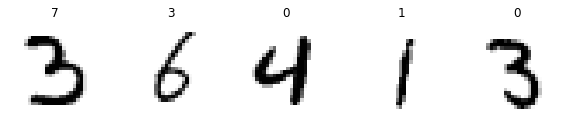

In [19]:
#lets plot some images from the dataset
plt.figure(figsize=(10,7))

for i in range(5):
  rand_indx = random.choice(np.arange((50000)))
  plt.subplot(1, 5, i+1)
  plt.imshow(X_train.iloc[rand_indx].to_numpy().reshape(28,28), cmap='binary')
  plt.grid(True)
  plt.axis(False)
  plt.title(f'{y[rand_indx]}')

plt.show()


In [20]:
# lets just convetrt the data in to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [21]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#### Experiments
  * Random Forest 
  * Extra -Trees
  * SVM

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

25000.0

In [27]:
random_forest = RandomForestClassifier( n_estimators=20, bootstrap=True, n_jobs=-1, max_features="auto")
random_forest.fit(X_train[:int(len(X_train)/2)], y_train[:int(len(X_train)/2)]) 
# limiting the data and n_estimators to a lower numbers as I dont have the compute power


RandomForestClassifier(n_estimators=20, n_jobs=-1)

In [28]:
xtra_clf = ExtraTreesClassifier( n_estimators=20, bootstrap=True, n_jobs=-1)
xtra_clf.fit(X_train[:int(len(X_train)/2)], y_train[:int(len(X_train)/2)])

ExtraTreesClassifier(bootstrap=True, n_estimators=20, n_jobs=-1)

In [30]:
svc_clf = SVC(probability=True)
svc_clf.fit(X_train[:int(len(X_train)/10)], y_train[:int(len(X_train)/10)])

SVC(probability=True)

In [31]:
# lets predict with all the models, and use test as the validation set

preds_forest = random_forest.predict(X_test)
preds_xtra = xtra_clf.predict(X_test)
preds_svc = svc_clf.predict(X_test)

In [36]:
# lets caluculate the accuracy for all the models
acc_forest = accuracy_score(preds_forest, y_test)
acc_xtra = accuracy_score(preds_xtra, y_test)
acc_svc = accuracy_score(preds_svc, y_test)

In [37]:
acc_forest, acc_xtra, acc_svc

(0.94875, 0.9464, 0.9515)

In [38]:
## as we can see SVC did best on the unseen data

In [39]:
# lest combine all the models and predict 

In [40]:
from sklearn.ensemble import VotingClassifier

In [41]:
forest_clf = RandomForestClassifier( n_estimators=20, bootstrap=True, n_jobs=-1, max_features="auto")
xtra_clf = ExtraTreesClassifier( n_estimators=20, bootstrap=True, n_jobs=-1)
svc_clf = SVC(probability=True)

vote_clf = VotingClassifier([('forest_clf', forest_clf), ('xtra_clf', xtra_clf), ('svc_clf', svc_clf)])

vote_clf.fit(X_train[:int(len(X_train)/10)], y_train[:int(len(X_train)/10)])

preds_ensemble = vote_clf.predict(X_test)

acc_ensemble = accuracy_score(y_test, preds_ensemble)
acc_ensemble

0.93885

In [46]:
## lets do stacking with the predictions from all three predictiors with hold-out dataset as test data
new_data = np.c_[preds_forest, preds_xtra, preds_svc]

In [43]:
preds_forest.shape, preds_xtra.shape, preds_svc.shape

((20000,), (20000,), (20000,))

In [50]:
# use the blender on the new dataset with old labels
rfc_ = RandomForestClassifier(n_estimators=10)
rfc_.fit(new_data, y_test)

RandomForestClassifier(n_estimators=10)